## SMS Spam Detection System 

#### **Import necessary libraries**

In [1]:
import pandas as pd    
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder
import nltk
from nltk.corpus import stopwords                       
import seaborn as sns
import string
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix
#import numpy as np
import pickle

#### **Load the dataset**

In [2]:
df = pd.read_csv("sms-spam.csv")        # read the csv file

##### Display some of the data to verify that the dataset is loaded successfully

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
# display last five rows

df.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [5]:
# display some random rows

df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4926,ham,Wanna do some art?! :D,NaN,NaN,NaN
1003,ham,&lt;#&gt; am I think? Should say on syllabus,NaN,NaN,NaN
1486,ham,Hello lover! How goes that new job? Are you th...,NaN,NaN,NaN
5220,ham,I have to take exam with in march 3,NaN,NaN,NaN
1059,spam,EASTENDERS TV Quiz. What FLOWER does DOT compa...,NaN,NaN,NaN


Display all the columns

In [6]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

#### **Data Cleaning**

In [7]:
df.info()           # print the concise summary of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


Delete unnecessary columns

In [8]:
# drop column 2, 3, 4 as they have majority missing values

df.drop(columns={'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'}, inplace=True)  

df.head()           

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


###### This was the first pre-processing step in which the unnecessary data is eliminated.

Replace the column names

In [9]:
# rename the column names to a better and meaningful column name

df.rename(columns={'v1':'Result', 'v2':'Input'}, inplace=True)

df.head()

,Result,Input
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Check for empty or null values

In [10]:
df.isnull()

,Result,Input
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
5567,False,False
5568,False,False
5569,False,False
5570,False,False


In [11]:
df.isnull().sum()                            # if the sum is other than 0 --> presence of null values

Result    0
Input     0
dtype: int64

###### <u>OBSERVATION</u>: No Null Values in the data

Check for duplicate values

In [12]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
5567    False
5568    False
5569    False
5570    False
5571    False
Length: 5572, dtype: bool

In [13]:
df.duplicated().sum()

403

###### <u>OBSERVATION</u>: 403 duplicated rows. These duplicated rows are not useful.

Delete duplicate values

In [14]:
df = df.drop_duplicates()

df.duplicated().sum()

0

In [15]:
df.shape              # Check for data-points now available

(5169, 2)

###### <u>OBSERVATION</u>: rows reduced from 5572 to 5169 after DUPLICATED values have been deleted

The data is to be represented in the form of numbers, so firstly replace the categorical values to zero and one.

In [16]:
#result has categorical labels, convert it into numerical values

encoder = LabelEncoder()

df['Result'] = encoder.fit_transform(df['Result'])

df

,Result,Input
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


###### <u>OBSERVATION</u>: 0 means no SPAM, 1 means SPAM

#### **Exploratory Data Analysis**

In [17]:
df['Result']

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: Result, Length: 5169, dtype: int32

In [18]:
df['Result'].value_counts()

Result
0    4516
1     653
Name: count, dtype: int64

In [19]:
653*100.0/5169

12.633004449603405

###### <u>OBSERVATION</u>: SPAM : 12.63% and HAM : 87.37% 

Create Pie Chart for the data (result values)

<function matplotlib.pyplot.show(close=None, block=None)>

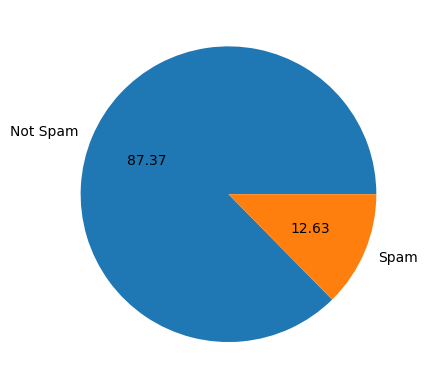

In [20]:
# for better representation

plt.pie(df['Result'].value_counts(), labels=['Not Spam', 'Spam'], autopct='%0.2f')

plt.show

###### <u>OBSERVATION</u>: Highly Imbalanced Data

NLP: Natural Language Processing

Now the data is in the form of texts and not in numbers. So for that the **'nltk'**(Natural Language Toolkit for text processing) library was imported.

Analyse the number of alphabets/words/sentences being used in the TEXT.

For this, create 3 new columns: 
* number of characters 
* number of words 
* number of sentences

Download all nltk modules or collections.


In [21]:
#nltk.download('all')                 # download all modules/collections

Create the three new columns

In [22]:
#create a new column with count of characters

df['Characters'] = df['Input'].apply(len)

In [23]:
#create a new column with count of words

df['Words'] = df['Input'].apply(lambda i:len(nltk.word_tokenize(i)))

#'word_tokenize' function takes a string of text as input and returns a list of words

In [24]:
#create a new column with count of sentences

df['Sentences'] = df['Input'].apply(lambda i:len(nltk.sent_tokenize(i)))

#'sent_tokenize' function takes a string of text as input and returns a list of sentences

In [25]:
df.head()

,Result,Input,Characters,Words,Sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


Summary of the new column values

In [26]:
df[['Characters', 'Words', 'Sentences']].describe()

,Characters,Words,Sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


Summary on the basis of Spam and Ham

In [27]:
#for HAM

df[df['Result'] == 0][['Characters', 'Words', 'Sentences']].describe()

,Characters,Words,Sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [28]:
#for SPAM

df[df['Result'] == 1][['Characters', 'Words', 'Sentences']].describe()

,Characters,Words,Sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


##### Plot Histograms

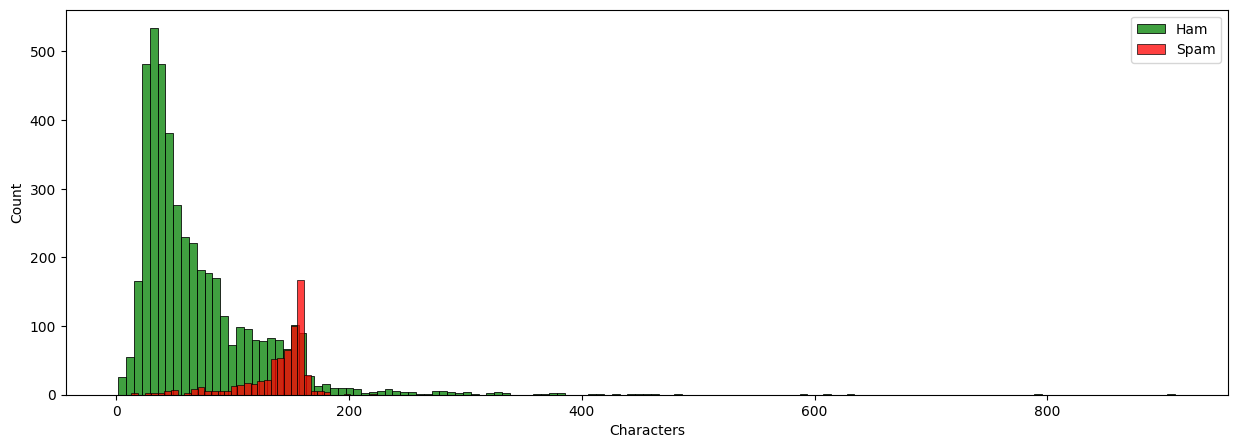

In [29]:
# for better visualization

plt.figure(figsize = (15, 5))

sns.histplot(df[df['Result'] == 0]['Characters'], color = "green", label="Ham")

sns.histplot(df[df['Result'] == 1]['Characters'], color = "red", label="Spam")

plt.legend()

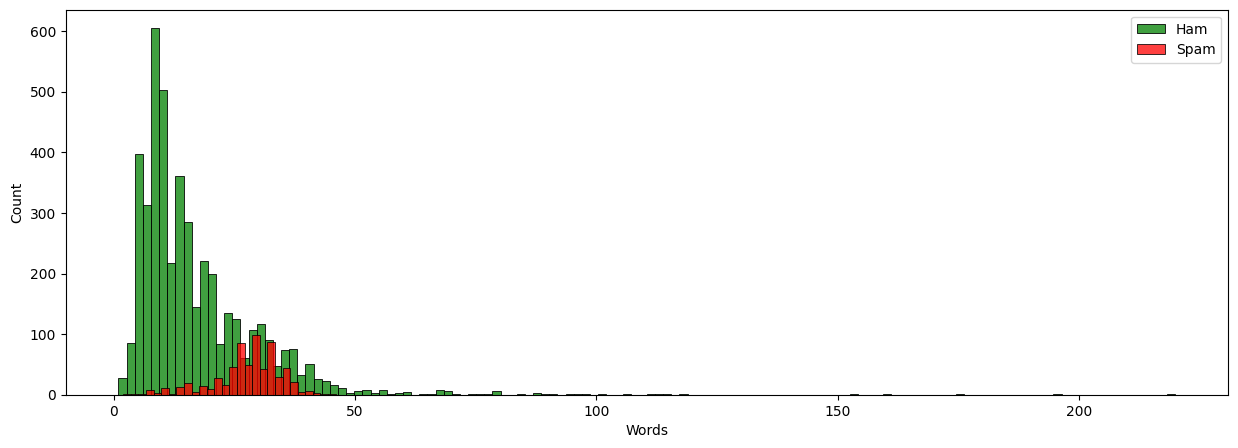

In [30]:
plt.figure(figsize = (15, 5))

sns.histplot(df[df['Result'] == 0]['Words'], color = "green", label="Ham")

sns.histplot(df[df['Result'] == 1]['Words'], color = "red", label="Spam")

plt.legend()

###### <u>OBSERVATION</u>: SPAM messages have more no of characters used, mean is 137.89 for SPAM and 70.45 for not SPAM

##### Find Relationships

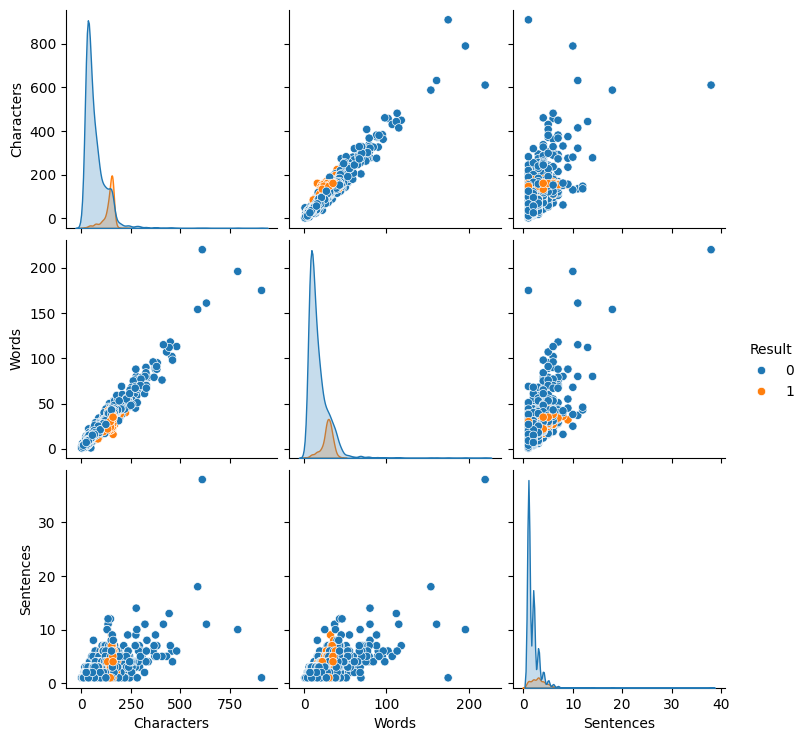

In [31]:
sns.pairplot(df, hue='Result')

#### **Data Preprocessing**

Pre-processing tasks to perform:
* use only small case alphabets (it's all the same whether it's 'YES' or 'yes' or 'Yes')
* peform tokenization (converting the text into tokens or words)
* remove stop words (words that ain't useful in classification, such as, 'ok', 'do not' etc.) 
* remove special characters and/or punctuations that are not useful as well 
* stem the data

Download Stopwords

In [32]:
nltk.download('stopwords')                     # downloads al the available stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shubh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [33]:
sw = stopwords.words('English')

sw

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

Create a pre-processing function

In [34]:
def transform_text(text):
    useful_words = []
    text = text.lower()                              # applying lowercase to the entire text

    # dividing the text, a sentence, into words
    words = nltk.word_tokenize(text)                 # divides entire sentence into words (a list of words)

    ps = PorterStemmer()                             # for stemming the data using 'PorterStemmer' algorithm

    # stemming and filtering out special characters, stopwords and punctuation characters
    for word in words:
        if word.isalnum() and word not in sw and word not in string.punctuation:
            useful_words.append(ps.stem(word))    
    
    return " ".join(useful_words)                    # returning the sentence

In [35]:
#create a new column to store the transformed text -> 'Processed'

df['Processed'] = df['Input'].apply(transform_text)

In [36]:
#display the edited dataframe with a new column 'Processed'

df.head()

,Result,Input,Characters,Words,Sentences,Processed
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


##### Visualize the dataset

Create word cloud for data visualization to display the most frequently occurring words in the processed dataset.

In [37]:
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

Word Cloud for the HAM(not SPAM) messages

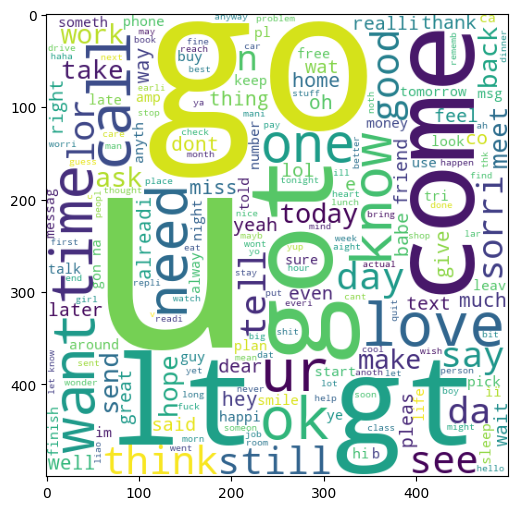

In [38]:
hamWC = wc.generate(df[df['Result'] == 0]['Processed'].str.cat(sep=" "))

#create figure and display
plt.figure(figsize=(12, 6))
plt.imshow(hamWC)

Word Cloud for the SPAM messages

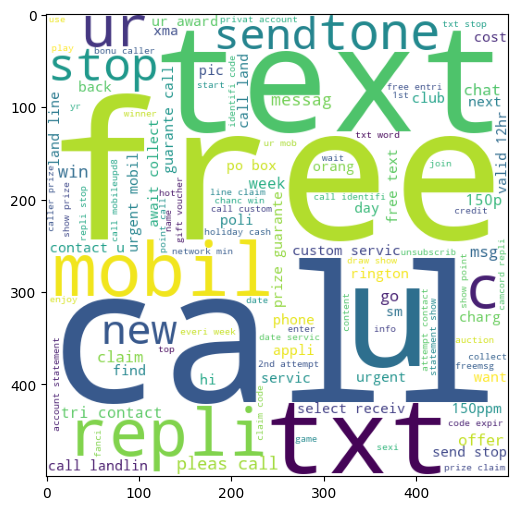

In [39]:
spamWC = wc.generate(df[df['Result'] == 1]['Processed'].str.cat(sep=" "))

#create figure and display
plt.figure(figsize=(12, 6))
plt.imshow(spamWC)

##### Extract the most common words used in both SPAM and HAM messages

In [40]:
#extract all the words used in SPAM messages
spamWords = list()

for msg in df[df['Result'] == 1]['Processed'].tolist():
  for word in msg.split():
    spamWords.append(word)

spamWords

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

In [41]:
#to count the frequency of the words, use the Counter class to create a dictionary
spamWordsDictionary = Counter(spamWords)

#to extract the most common words
spamWordsDictionary.most_common(40)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45),
 ('custom', 42),
 ('messag', 42),
 ('guarante', 42),
 ('per', 41),
 ('chat', 38),
 ('tri', 37),
 ('msg', 35),
 ('draw', 35),
 ('number', 35),
 ('cs', 35)]

In [42]:
#convert the dictionary to a dataframe

mostCommonSPAM = pd.DataFrame(spamWordsDictionary.most_common(40))

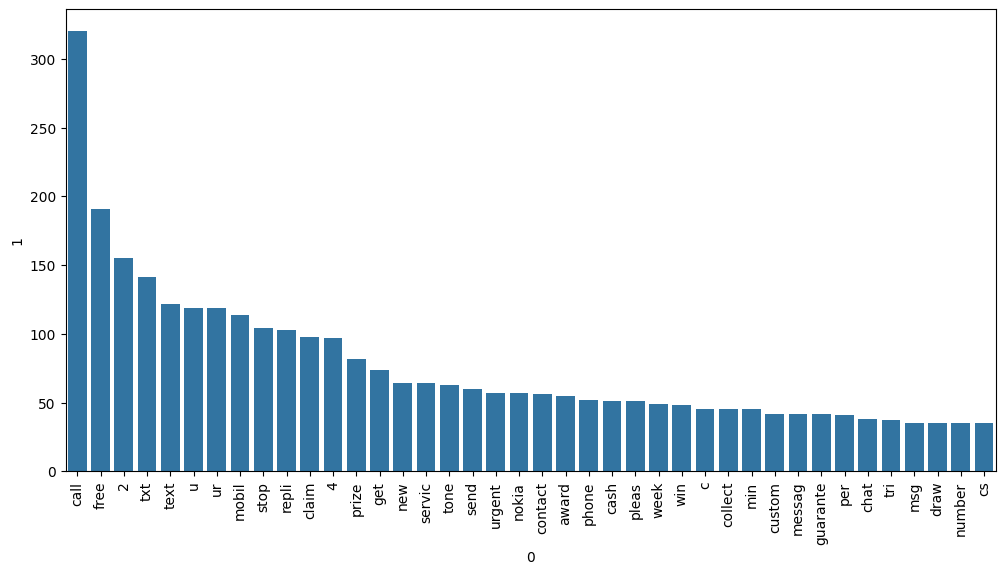

In [43]:
#plot a bar plot of the mostCommonSPAM dataframe

plt.figure(figsize=(12, 6))

sns.barplot(data = mostCommonSPAM, x=0, y=1)

plt.xticks(rotation='vertical')

plt.show()

###### <u>OBSERVATION</u>: words like 'CALL', 'FREE', '2', 'TXT', 'TEXT', 'UR', 'MOBIL' are the most common words in SPAM texts

#### **Model Building**

NaiveBayes classifier works BEST on textual data, so firstly perform it on the dataset.

In [44]:
models = [GaussianNB(), MultinomialNB(), BernoulliNB()]                  # try out different models to find the one that is most efficient


As the classifier model needs numerical inputs, convert the 'Processed' column into vectors.

Use 'bag of words'

##### Try out Count Vectorizer

In [45]:
#convert the collection of text into a matrix of token counts

cv = CountVectorizer()

In [46]:
#transform the data of processed column

X = cv.fit_transform(df['Processed']).toarray()            # features or independent variables

X.shape                #print size of X

(5169, 6708)

In [47]:
#store the values of the 'Result' column

y = df['Result'].values                    # labels or dependent variable

y

array([0, 0, 1, ..., 0, 0, 0])

In [48]:
#split the training and testing dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 49)

print(f"Successfully splitted the dataset!\nFeatures Training set : {len(X_train)} and Features Testing set : {len(X_test)}\nLabels Training set : {len(y_train)} and Labels Testing set : {len(y_test)}")

Successfully splitted the dataset!
Features Training set : 4135 and Features Testing set : 1034
Labels Training set : 4135 and Labels Testing set : 1034


In [49]:
results_cv = []             # to store the result(scores) of the models

for model in models:
    model.fit(X_train, y_train)

    y_predict = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_predict)
    cm = confusion_matrix(y_test, y_predict)
    precision = precision_score(y_test, y_predict)

    results_cv.append({
        "Model": model.__class__.__name__,
        "Accuracy": f"{accuracy:.2f}",
        "Precision": f"{precision:.2f}",
        "Confusion Matrix": cm
    })

pd.DataFrame(results_cv)


,Model,Accuracy,Precision,Confusion Matrix
0,GaussianNB,0.86,0.48,"[[774, 125], [18, 117]]"
1,MultinomialNB,0.97,0.88,"[[882, 17], [14, 121]]"
2,BernoulliNB,0.96,0.95,"[[893, 6], [31, 104]]"


###### Focus mainly on 'precision' value
###### <u>OBSERVATION</u>: The max precision obtained is 9.50 with 9.60 as accuracy by model 'BernoulliNB'

##### Try TFID vectorizer

In [50]:
#use 'TfidfVectorizer' for vectorization 

tf = TfidfVectorizer()

In [51]:
#transform the data of processed column

X = tf.fit_transform(df['Processed']).toarray()            # features or independent variables

X.shape

(5169, 6708)

In [52]:
#store the values of the 'Result' column

y = df['Result'].values                                    # labels or dependent variable

y

array([0, 0, 1, ..., 0, 0, 0])

In [53]:
#split the training and testing dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 49)

In [54]:
results_tf = []

for model in models:
    model.fit(X_train, y_train)

    y_predict = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_predict)
    cm = confusion_matrix(y_test, y_predict)
    precision = precision_score(y_test, y_predict)

    results_tf.append({
        "Model": model.__class__.__name__,
        "Accuracy": f"{accuracy:.2f}",
        "Precision": f"{precision:.2f}",
        "Confusion Matrix": cm
    })

pd.DataFrame(results_tf)


,Model,Accuracy,Precision,Confusion Matrix
0,GaussianNB,0.86,0.48,"[[775, 124], [21, 114]]"
1,MultinomialNB,0.96,1.00,"[[899, 0], [44, 91]]"
2,BernoulliNB,0.96,0.95,"[[893, 6], [31, 104]]"


###### <u>OBSERVATION</u>: TFID vectorizer results in more accurate and precise models. The max precision obtained is 1.00 with 9.60 as accuracy by model 'MultinomialNB'

Use TFID Vectorizer and MultinomialNB model.

In [55]:
model = MultinomialNB()

model.fit(X_train, y_train)

MultinomialNB()

Model is prepared

Save the model and vectorizer

In [56]:
#pickle 2 files

pickle.dump(tf,open('vectorizer.pkl','wb'))
pickle.dump(model,open('model.pkl','wb'))